## Data Preprocessing

### Training set: X
### Preprocessing (feature scaling/mean normalization)
$$u_{i} = \frac{1}{m} \sum\limits_{i = 1}^{m} (x^{(i)}) $$

### Replace each $$x_{i}$$ with $$x_{i} - u_{i}$$

### If different features on different scales e.g. $$x_{1}= size of house $$ $$x_{2}= number of bedrooms $$
### then scale features to have comparable range of values


## Principal Component Analysis (PCA) algorithm

>**Reduce data from n-dimensions to k-dimensions:**  
**Compute "covariance matrix: "** $\sum = \frac{1}{m} \sum\limits_{i = 1}^{m} (x^{(i)}) (x^{(i)})^{(T)}$  
**[U, S, V] = svd(Sigma);**
**Compute "eigenvectors" of matrix:** $\sum$

>**svd = Single Value Decompisition**  
**Other libararies: eig(Sigma)**  
**U is nxn matrix**

>**Ureduce = U(:,1:k)**  
**z = Ureduce** $^{(T)}$ * **X**

In [1]:
import pandas as pd
from sklearn.datasets import load_digits

In [2]:
dataset = load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
dataset.data.shape

(1797, 64)

<Figure size 640x480 with 0 Axes>

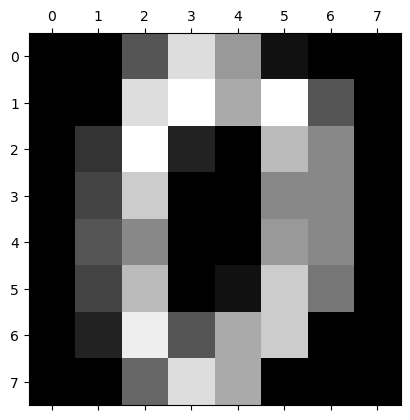

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.gray()
plt.matshow(dataset.data[0].reshape(8,8))

In [5]:
import numpy as np
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [6]:
dataset.target[9]

9

In [7]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [8]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [9]:
X = df
y = dataset.target

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.9722222222222222

In [13]:
X.shape

(1797, 64)

In [14]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [15]:
X_pca

array([[ -1.25946645,  21.27488348,  -9.46305462, ...,   3.67072108,
         -0.9436689 ,  -1.13250195],
       [  7.9576113 , -20.76869896,   4.43950604, ...,   2.18261819,
         -0.51022719,   2.31354911],
       [  6.99192297,  -9.95598641,   2.95855808, ...,   4.22882114,
          2.1576573 ,   0.8379578 ],
       ...,
       [ 10.8012837 ,  -6.96025223,   5.59955453, ...,  -3.56866194,
          1.82444444,   3.53885886],
       [ -4.87210009,  12.42395362, -10.17086635, ...,   3.25330054,
          0.95484174,  -0.93895602],
       [ -0.34438963,   6.36554919,  10.77370849, ...,  -3.01636722,
          1.29752723,   2.58810313]])

In [16]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.shape

(array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
        0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
        0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
        0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
        0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
        0.00596081, 0.00575615, 0.00515158, 0.0048954 ]),
 (29,))

In [17]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [18]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.9694444444444444

In [19]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 12)

In [20]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782414,
       0.04916909, 0.04315987, 0.03661371, 0.03353229, 0.03078758,
       0.02372218, 0.02272616])

In [21]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

/Users/JOSH/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9444444444444444